### Libraries

In [87]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

### Load Airbnb Dataset

In [54]:
airbnb_df = pd.read_csv("Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [55]:
#basic information about dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [56]:
#renaming columns
airbnb_df = airbnb_df.rename({'id':'listing_id','name':'listing_name', 'number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}, axis = 1)

In [57]:
#duplicates checking
airbnb_df = airbnb_df.drop_duplicates()
airbnb_df.shape

(48895, 16)

There is no duplicates in the dataset, because shape remained the same.

In [58]:
#checking for missing data
airbnb_df.isna().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

Missing data are present in categorical variables: *name* and *host_name* and in numerical variables *last_review* and *reviews_per_month*

Missing values in numerical variables will be replaced with *unknown*.

In [59]:
#filling missing data in categorical variables
airbnb_df['listing_name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('unknown',inplace=True)

Variable *last_review* is useless for future analysis, so it will be deleted from dataset.  
Missing values in *reviews_per_month* will be repleaced with zeros.

In [60]:
#coping with missing data in numerical variables
airbnb_df = airbnb_df.drop(['last_review'], axis = 1)
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].astype('int64')

In [61]:
#checking again for missing data
airbnb_df.isna().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

### Checking unique values in variables

In [72]:
airbnb_df[['listing_id','host_id','neighbourhood','neighbourhood_group']].nunique()

listing_id             48895
host_id                37457
neighbourhood            221
neighbourhood_group        5
dtype: int64

There are 48895 unique listings and 37457 unique hosts. Moreover there are 221 neighbourhoods grouped in 5 neighbourhood_groups.

### Descriptive statistics and outliers detection

In [73]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


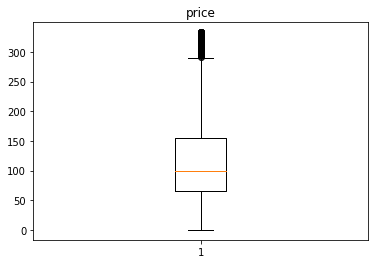

In [99]:
fig = plt.boxplot(airbnb_df['price'])
plt.title('price')
plt.show()

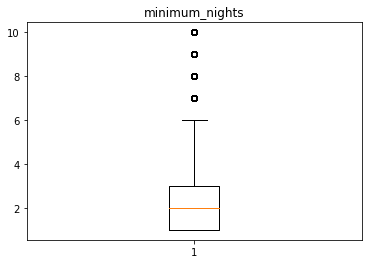

In [103]:
fig = plt.boxplot(airbnb_df['minimum_nights'])
plt.title('minimum_nights')
plt.show()

The two variables where outliers are worrying are price and minimum nights. outliers will be removed using the IQR method.

In [77]:
#IQR method

def IQR_method(variable):
    q1 = numpy.quantile(variable, 0.25)
    q3 = numpy.quantile(variable, 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [80]:
price_lower, price_upper = IQR_method(airbnb_df['price'])
minimum_nights_lower, minimum_nights_upper = IQR_method(airbnb_df['minimum_nights'])

airbnb_df = airbnb_df[(airbnb_df['price'] > price_lower) & (airbnb_df['price'] < price_upper) & (airbnb_df['minimum_nights'] > minimum_nights_lower) 
                      & (airbnb_df['minimum_nights'] < minimum_nights_upper)]

In [104]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,3.970700e+04,3.970700e+04,39707.000000,39707.000000,39707.000000,39707.000000,39707.000000,39707.000000,39707.000000,39707.000000
mean,1.883402e+07,6.623531e+07,40.727568,-73.949138,119.001385,2.689677,26.388420,0.926713,3.074042,97.187045
std,1.084220e+07,7.752118e+07,0.056297,0.047721,67.180066,1.849758,47.487147,1.593702,19.751449,124.372039
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.415918e+06,7.825168e+06,40.688070,-73.981040,65.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.947280e+07,3.073552e+07,40.720070,-73.953320,100.000000,2.000000,7.000000,0.000000,1.000000,25.000000
75%,2.861314e+07,1.036552e+08,40.763260,-73.932150,155.000000,3.000000,29.000000,1.000000,2.000000,179.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,10.000000,629.000000,58.000000,327.000000,365.000000
